# Linear Regression - Chemical examples

This notebook will take you through some regression examples with some recently published data so you can see how regression can be useful in your research, and will teach you the regression and demonstrate how you use regression in actual research.

![PrettyImage.gif](attachment:PrettyImage.gif)

**The chemical problem** Cellulose is a readily available material that can be used to make useful biodegradable materials from waste materials (like bagasse, the husks of sugar cane left over after processing). However the first stage of processing is to dissolve cellulose which is very difficult. Currently, liquid salts called ionic liquids (IL) are used to do this (which are nice solvents in terms of green chemistry as they have no vapour pressure so can be recovered, but they are horrible solvents to handle). Ionic liquids are(very!)  expensive, and the resulting cellubiose-ionic liquid mixture is very thick and hard to process. The solution to both these problems is to dilute the ionic liquid with a co-solvent (CS), and the mixture of ionic liquid and co solvent is called an organic electrolyte solutions (OES). 

In this notebook, we will look at data which will help us figure out which CS are the best and why. Any small improvement in cellulose processing is worth billions of dollars due to increasing the efficiency of the paper and biodegradable plastics industries. Furthermore, this work can be used to switch co-solvents for safer or greener options.

**Materials**
1-Ethyl-3-methylimidazolium acetate (>95% purity, Sigma-Aldrich) and microcrystalline cellulose (Sigma-Aldrich, 20 μm particle size) were dried at 80 °C under reduced pressure to constant mass. Dipolar aprotic solvents (all >99% purity, Sigma-Aldrich) were used as received, except for sulfolane, which was dried over activated 3 Å molecular sieves. The water content of the ionic liquid and solvents was measured by Karl Fisher titration and found to be: [EMIm][OAc] 1.1%; 1-methylimidazole 0.2%; dimethyl sulfoxide 1.1%; N,N-dimethylformamide 0.3%; N,N′-dimethylimidazolidinone 0.7%; N,N-dimethylacetamide 0.4%; sulfolane 0.1%; propylene carbonate 0.1%; γ-valerolactone 0.8%; N,N,N′,N′-tetramethylurea 0.3%; N-methylpyrrolidinone 0.8%; and γ-butyrolactone 0.3%.

![cosolvents.gif](attachment:cosolvents.gif)

**Solubility Tests**
Solubility tests were conducted at 70 °C. As the cellulose solutions formed are viscous and not amenable to filtration, solubility was determined by addition of small aliquots of dried microcrystalline cellulose (MC) to mixtures of [EMIm][OAc]/cosolvent of appropriate composition. The maximum amount of MC that dissolved, a, and minimum amount that did not dissolve, b, were recorded, giving an under- and overestimate for the maximum amount of MC dissolvable, v. Repeated determinations, using smaller incremental added weights of MC then led to a narrow range between “soluble” and “insoluble”. (As MC tended to form aggregates when added directly to OESs, a slightly modified procedure was followed once approximate solubility values were known at any given OES composition: to a weighed quantity of dried MC was added a measured quantity of the selected cosolvent; after stirring for 1 min to wet and disperse the MC powder, calculated quantities of IL were added, and then, small, weighed aliquots were added until no further MC would dissolve.) Apparently “insoluble” samples were maintained for a minimum of 16 h at 70 °C to confirm the lack of further dissolution.
Each pair of points (ai, bi) was given a weight, wi,:
(1)
based on, vi, the errors on ai and bi, as given by vi = (bi– ai)/2, such that the uncertainties on points ai and bi are ai+ vi and bi– vi respectively. Other sources of error are much smaller in comparison.

**References for this data:**

[1] Ella Gale, Remigius H. Wirawan, Rodrigo L. Silveira, Caroline S. Pereira, Marcus A. Johns, Munir S. Skaf and Janet L. Scott, "Directed Discovery of Greener Cosolvents: New Cosolvents for Use in Ionic Liquid Based Organic Electrolyte Solutions for Cellulose Dissolution," *ACS Sustainable Chem. Eng.*, 2016, **4**, 11, 6200--6207
Publication Date:September 28, 2016
https://doi.org/10.1021/acssuschemeng.6b02020

[2] Gale, E. M., Johns, M. A., Wirawan, R. H., & Scott, J. L. (2017). "Combining random walk and regression models to understand solvation in multi-component solvent systems." *Physical Chemistry Chemical Physics*, **19**(27), 17805-17815. https://doi.org/10.1039/c7cp02873c

## Contents

In [113]:
# first we import some useful libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

**Linear regression practice:** 
Which solvent parameter explains most the variance? R2 practice

**Non-linear fitting**
Does our model fit the data? Linearising non-linear data

**Linear vs ridge regression** 
What explains the difference between co-solvents?

**Polynomial regression model**
Fitting more complicated models for the outlyers


## Investigation of the data

Plot and explain the data 

At the moment, the different OES systems look vastly different. They cross the x-axis in different places, i.e. the different systems require more ionic liquid to start dissolving the cellulose, the curves also have different shapes and curvature.

If we are able to understand these systems and explain what is happening here, we should have the knowledge to replot these data such that all the OES's overlap, and then the best fit line to that would be the explanation for why the different co-solvents cause different behaviour. And from that, we should be able to predict other solvents and other systems. 

# 1. Linear Regression - Fitting the area under the dissolution curves to co-solvent properties

We want to try and find out which chemical characteristics of the solvents could explain this behaviour. Before fitting the lines, lets look at hte behaviour of the OESs as a series. As each OES was tested over the entire range of ionic liquid molar fraction, we can take the area under the curve to give us a rough measure of the 'goodness' of the co-solvents. These rough measures can then be screened against several chemical characteristics to see which ones might be involved in explaining hte different between the cosolvents. 

In [ ]:
To go here: 
    p* etc as linear fits

Hopefully you can see that these individual parameters do not explain everything, and, it's likely that some of these points are outliers

# 2. Non-linear fitting - part 1: Fitting the cellulose disolution curves

Now, we're going to try and fit the individual OES curves.

# 3. Non-linear fitting - part 2: Comparing linear and higher order fits

One thing that varies about this curve is the point at which the cellulose starts to dissolve, i.e. where it crosses the x-axis. This is the minimum mole fraction of ionic liquid required to get any dissolution at all. So, different co-solvents require different amounts of IL in the mixture to do anything at all. For example, TMU is a bad co-solvent, DMI is a good one.

Looking at the chemical structures, we can see that TMU is not a ring, and had 4 methyl groups that can spin and pivot around taking up space. DMI is the ring version of TMU, and being a ring the methyls and CH2 hydrogens are much more constrained. Note also that the other very good co-solvents are 1-MI and DMSO are small molecules.

Perhaps the different behaviour of the OESs is related to the volume of the co-solvents?

To find out we take as our input is the minimum ionic liquid molar fraction X (the Greek letter 'chi' is used for molar fraction in the chemical literature), called `chiIL_min` below. Our target output is the molar volume of the co-solvent (`vol_m` below), which is a value we can look up. 

This is the data:

In [5]:
vol_m = np.array([71.3, 82.4, 107.3, 122.6, 96.44, 76.8, 82.63, 
  95.27, 93.02, 96.2, 85.])
chiIL_min = np.array([0.026125, 0.046998, 0.136876, 
  0.413974, 0.04399, 0.04875, 
  0.05349, 0.0675487, 0.07219, 
  0.13881,0.1341])

### Put the data into a DataFrame

In [108]:
data={'molar volume': vol_m, 'minimum chi ionic liquid': chiIL_min}

In [109]:
# Create pandas dataframe to store our X and y values
df = pd.DataFrame(data)

In [110]:
# Show the first five rows of our dataframe
df.head()

,molar volume,minimum chi ionic liquid
0,71.30,0.026125
1,82.40,0.046998
2,107.30,0.136876
3,122.60,0.413974
4,96.44,0.043990


### Plot the data

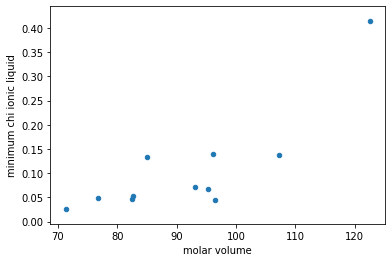

In [111]:
df.plot.scatter("molar volume", "minimum chi ionic liquid")

*Now the question is is this best fit by a straight line or a curve?*

### Fit the data to a straight line and get the residuals

In [114]:
# instantiate the model
model = LinearRegression(fit_intercept=True)
# set up fit the model to the data
model.fit(df[["molar volume"]], df["minimum chi ionic liquid"])
# set up x
xfit = np.linspace(70, 130)
# predict y
yfit = model.predict(xfit[:, np.newaxis])

### Plot the fit

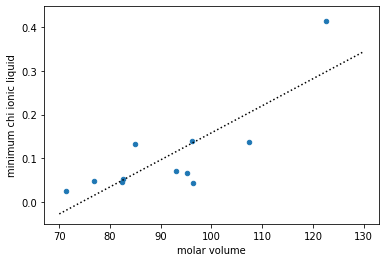

In [115]:
ax = df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

### Get the R2 value and set it equal to R2linear

In [118]:
R2linear = model.score(df[["molar volume"]], df["minimum chi ionic liquid"])

In [120]:
print("R2 for the linear fit is: {}".format(R2linear))

R2 for the linear fit is:0.6671587782964709


### Fit the data to a curve line and get the residuals

In [139]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())

poly_model.fit(df[["molar volume"]],df["minimum chi ionic liquid"])

xfit = np.linspace(70, 130)
# predict y
yfit = poly_model.predict(xfit[:, np.newaxis])

### Plot the fit

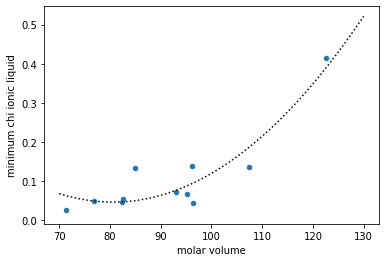

In [131]:
ax = df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

### Get the R2 value and set it equal to R2Curve

In [140]:
R2curve = poly_model.score(df[["molar volume"]], df["minimum chi ionic liquid"])

### Results:

In [154]:
print("The linear fit R2 score is: {}".format(R2linear))
print("The curve fit R2 score is: {}\n".format(R2curve))
if R2linear > R2curve:
    print("The linear fit is better")
elif R2linear < R2curve:
    print("The curved fit is better")
else:
    print("You've made a mistake, probably not setting R2curve.")


The linear fit R2 score is: 0.6671587782964709
The curve fit R2 score is: 0.8626575620820776

The curved fit is better


*By eye, and from the residuals, you can probably tell which fit is the better one.*

## Overfitting

Is it the case that a better R2 score is always better?

There is a the concept of **overfitting** your data, which we are going to try now.

### This time, use 7 polynomial features to fit the data to a curve line and get the residuals

In [156]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

poly_model.fit(df[["molar volume"]],df["minimum chi ionic liquid"])

xfit = np.linspace(70, 130)
# predict y
yfit = poly_model.predict(xfit[:, np.newaxis])

### Plot the fit

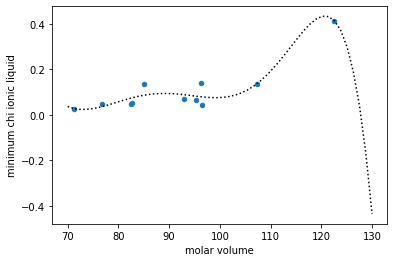

In [157]:
ax = df.plot.scatter("molar volume", "minimum chi ionic liquid")
ax.plot(xfit, yfit, linestyle=":", color="black")

### Results:

In [160]:
print("The linear fit R2 score is: {}".format(R2linear))
print("The curve fit R2 score is: {}".format(R2curve))
print("The curve fit R2 score is: {}".format(R2overfit))

The linear fit R2 score is: 0.6671587782964709
The curve fit R2 score is: 0.8626575620820776
The curve fit R2 score is: 0.9268359712253263


**Regression Conclusion**

*Overfitting* 
Look at the three graphs you've plotted, which fit seems the best? 

Just adding more features is not the best way to fit data. Generally, you want the fitting equation to be as simple as possible, but no simpler. With this data, the linear fit is the simplest, but not the most informative. The quadratic fit is a good mix of explanation (it explains 86% of the variance after all) and usefulness. The 7-featured polynomial fit is overfitting the data.

*How do we find out which fit is the best?*
One method would be to get more data, if possible, if we were to measure another co-solvent with a molar volume larger than TMU we could see if it is closer to the quadratic or linear fit. If we cannot measure more data (for example, in the chemical sciences there may not be another solvent with similar properties but a larger molar volume) then we use the **leave one out** approach, which is exactly what it sounds like, you remove one of the points and do the fits and see how well the fitted equation predicts the value you left out. 

*Is there a general rule of thumb?*
If you have a theory that is predicting something relevant about your data, then obviously fit your data to that equation. Overwise, stick with the simpler fits. Never use a fit with more features than the number of datapoints, and generally less than 3 or 4. 

**Chemistry Conclusion**

In the paper[2] this data comes from the quadratic fit was plotted, as there is no theoretical reason why the fit should have that shape, this was presented as an experimental observation. However, a major factor in the quadratic fit comes down to whether TMU is part of the trend, in which case the quadratic trend is best, but if TMU is an outlier then a straight line through the remaining points would be a good fit. 

The fact that molar volume can be used to explain around 80% of why different co-solvents require different molar fractions of ionic liquid to start dissolving cellulose suggests that the volume of the molecules will be important in explaining this process.

In the next section we're going to continue with the insight that the co-solvent molar volume is important and try to explain what the co-solvents are doing.

# Ridge regression

**Plan**

Introduce that plotting derrived values has striaghtend the line, maybe do the fit

Split data into two types: typical ie. DMSO and DMI and atypical: ie. TMU and 1MI

do linear regression and ridge regression on the atypical, note the larger r2 values for linear fit.

explain that ridge does regularisation which minimises the total error rather than average, this makes data more resilient to the variance in the data (I think) and avoids overfitting. 

Now test the atypical fits with the typical data, note that the typical data is better fit by ridge than normal, due to ridge ignoring the outliers in the atypical. 

Now switch, and demonstrate that as the typical has no outliers, the prediction is hte same. 

Conclude that ridge regression is better for predicting. Explain that they will be using ridge regression in hte exercise later. 

In short, ridge regression and lasso are regression techniques optimized for prediction, rather than inference.

Normal regression gives you unbiased regression coefficients (maximum likelihood estimates "as observed in the data-set").

Ridge and lasso regression allow you to regularize ("shrink") coefficients. This means that the estimated coefficients are pushed towards 0, to make them work better on new data-sets ("optimized for prediction"). This allows you to use complex models and avoid over-fitting at the same time.

For both ridge and lasso you have to set a so-called "meta-parameter" that defines how aggressive regularization is performed. Meta-parameters are usually chosen by cross-validation. For Ridge regression the meta-parameter is often called "alpha" or "L2"; it simply defines regularization strength. For LASSO the meta-parameter is often called "lambda", or "L1". In contrast to Ridge, the LASSO regularization will actually set less-important predictors to 0 and help you with choosing the predictors that can be left out of the model. The two methods are combined in "Elastic Net" Regularization. Here, both parameters can be set, with "L2" defining regularization strength and "L1" the desired sparseness of results.

Here you find a nice intro t

Even though the linear model may be optimal for the data given to create the model, it is not necessarily guaranteed to be the best model for predictions on unseen data

If our underlying data follows a relatively simple model, and the model we use is too complex for the task, what we are essentially doing is we are putting too much weight on any possible change or variance in the data. Our model is overreacting and overcompensating for even the slightest change in our data. People in the field of statistics and machine learning call this phenomenon overfitting. When you have features in your dataset that are highly linearly correlated with other features, turns out linear models will be likely to overfit.

Ridge Regression, avoids over fitting by adding a penalty to models that have too large coefficients

normal linear regression minimizes the total rather than the average loss?

In [221]:
# read data into a DataFrame
vol1MI = pd.read_csv("./tutorialdata/vols1MI.csv")

volDMSO = pd.read_csv("./tutorialdata/volsDMSO.csv")
volDMI = pd.read_csv("./tutorialdata/volsDMI.csv")

volTMU = pd.read_csv("./tutorialdata/volsTMU.csv")
vol1MI.head()

,vol_frac_IL,chi_cell
0,0.131362,0.012847
1,0.132977,0.013031
2,0.262925,0.041912
3,0.266285,0.040630
4,0.264540,0.043370


### Put the data into a DataFrame

In [262]:
# Create pandas dataframe to store our X and y values
df = pd.DataFrame(vol1MI)
dfDMSO = pd.DataFrame(volDMSO)

In [263]:
# Show the first five rows of our dataframe
df.head()

,vol_frac_IL,chi_cell
0,0.131362,0.012847
1,0.132977,0.013031
2,0.262925,0.041912
3,0.266285,0.040630
4,0.264540,0.043370


### Plot the data

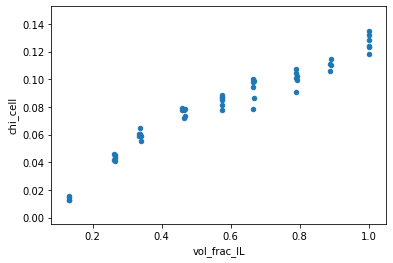

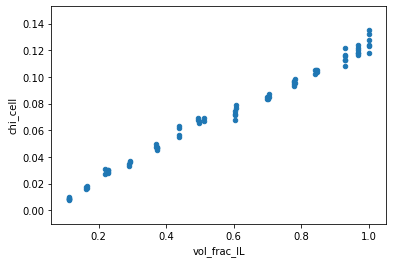

In [264]:
df.plot.scatter("vol_frac_IL", "chi_cell")
dfDMSO.plot.scatter("vol_frac_IL", "chi_cell")

*Now the question is is this best fit by a straight line or a curve?*

### Fit the data to a straight line and get the residuals

In [265]:
# instantiate the model
model = LinearRegression(fit_intercept=True)
# set up fit the model to the data
model.fit(df[["vol_frac_IL"]], df["chi_cell"])
# set up x
xfitlin = np.linspace(0, 1)
# predict y
yfitlin = model.predict(xfit[:, np.newaxis])

### Plot the fit

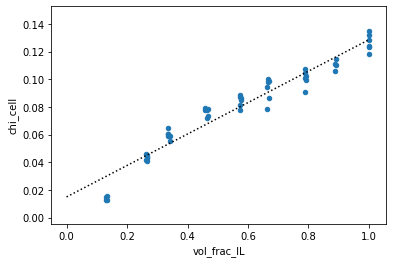

In [266]:
ax = df.plot.scatter("vol_frac_IL", "chi_cell")
ax.plot(xfitlin, yfitlin, linestyle=":", color="black")

### Get the R2 value and set it equal to R2linear

In [267]:
R2linear = model.score(df[["vol_frac_IL"]], df["chi_cell"])

In [268]:
print("R2 for the linear fit is: {}".format(R2linear))

R2 for the linear fit is: 0.9380442025748845


In [269]:
len(df)

50

In [270]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(alpha=0.50)
clf.fit(df[["vol_frac_IL"]], df["chi_cell"]) 
xfitridge = np.linspace(0,1)

In [271]:
yfitridge = clf.predict(xfit[:, np.newaxis])

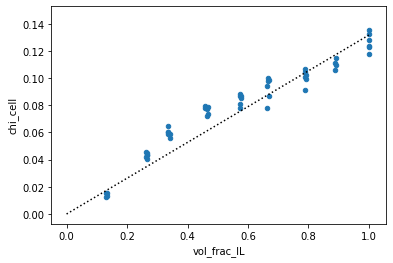

In [272]:
ax = df.plot.scatter("vol_frac_IL", "chi_cell")
ax.plot(xfitridge, yfitridge, linestyle=":", color="black")

In [273]:
clf.score(df[["vol_frac_IL"]], df["chi_cell"])

0.8932588001852567

In [274]:
clf.coeff

AttributeError: 'KernelRidge' object has no attribute 'coeff'

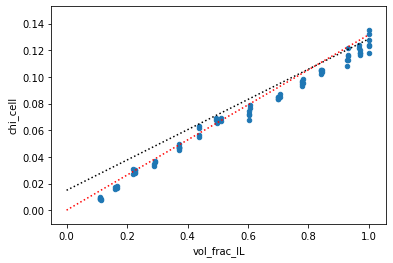

In [275]:
ax = dfDMSO.plot.scatter("vol_frac_IL", "chi_cell")
ax.plot(xfitlin, yfitlin, linestyle=":", color="black")
ax.plot(xfitridge, yfitridge, linestyle=":", color="red")

0.9380442025748845

In [314]:
print("{:.2f}, {}".format(model.score(df[["vol_frac_IL"]], df["chi_cell"]),clf.score(df[["vol_frac_IL"]], df["chi_cell"])))

0.94, 0.8932588001852567


In [321]:
print("CS\tLinear\tRidge")

print("1-MI\t{:.2f},\t {:.2f}\t".format(
    model.score(df[["vol_frac_IL"]], df["chi_cell"]),
    clf.score(df[["vol_frac_IL"]], df["chi_cell"])))

print("DMSO\t{:.2f},\t {:.2f}\t".format(
    model.score(dfDMSO[["vol_frac_IL"]], dfDMSO["chi_cell"]),
    clf.score(dfDMSO[["vol_frac_IL"]], dfDMSO["chi_cell"])))


CS	Linear	Ridge
1-MI	0.94,	 0.89	
DMSO	0.93,	 0.97	


## 2nd Model

Let's load in some data this time, and fit it

In [25]:
from sklearn.kernel_ridge import KernelRidge
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
clf = KernelRidge(alpha=1.0)
clf.fit(X, y) 
xfit = np.linspace(70, 130)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
            kernel_params=None)

In [322]:
20.0/784.0

0.025510204081632654